PART 02 파이썬 분석

> CHAPTER 03 제2유형: 데이터 분석
> >SECTION 03 지도학습 - 회귀(예측)
> > >**01 단순 선형 회귀분석을 이용한 예측 문제 해결**

In [3]:
import numpy as np        # 넘파이 패키지 임포트
import pandas as pd       # 판다스 패키지 임포트
import sklearn            # 싸이킷런 패키지 임포트
import matplotlib.pyplot as plt # 맷플롯립 패키지 임포트

# 선형회귀모델을 위한 패키지 임포트
from sklearn.linear_model import LinearRegression
# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

In [4]:
# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")

In [5]:
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model-year  
0            70  
1            70  
2            70  
3            70  
4            70  
..          ...  
393          82  
394          82  
395          82  
396          82  
397          82  

[398 rows x 7 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


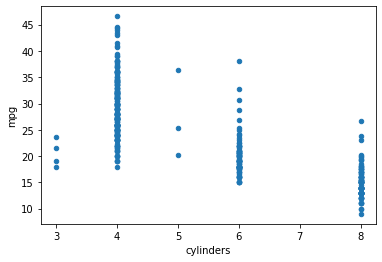

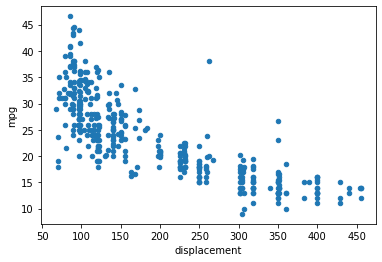

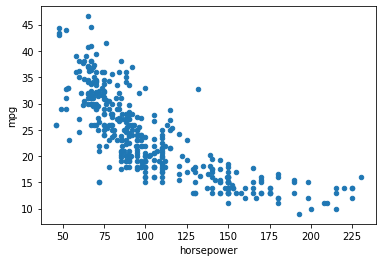

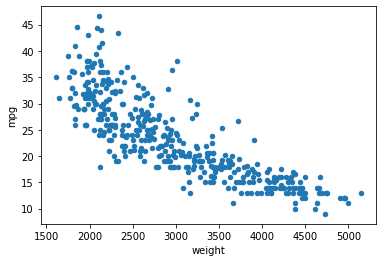

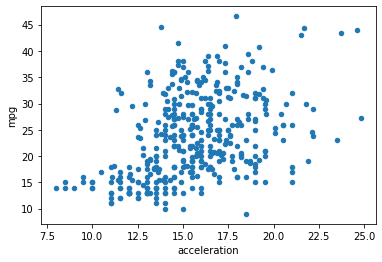

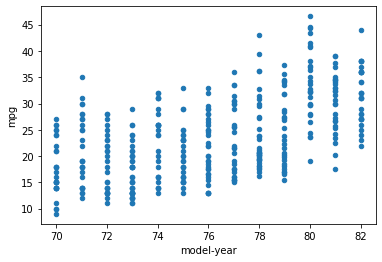

In [7]:
# 종속변수 mpg와 다른 변수들 간의 상관관계 분석
df.plot(kind='scatter', x='cylinders', y='mpg')
plt.show()
df.plot(kind='scatter', x='displacement', y='mpg')
plt.show()
df.plot(kind='scatter', x='horsepower', y='mpg')
plt.show()
df.plot(kind='scatter', x='weight', y='mpg')
plt.show()
df.plot(kind='scatter', x='acceleration', y='mpg')
plt.show()
df.plot(kind='scatter', x='model-year', y='mpg')
plt.show()

In [8]:
# 결측값이 있는 행전체 제거 (axis가 1이면 열을 제거)
df = df.dropna(axis=0)

In [9]:
# 분석 데이터셋 준비 : weight-mpg 분석
X = df[["weight"]]  # 독립변수(설명변수)
y = df["mpg"]       # 종속변수(목표변수)

In [10]:
# 분석 데이터셋 분할(8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [11]:
print(X_train.shape)    # 학습 데이터(독립변수)
print(X_test.shape)     # 테스트 데이터(독립변수)
print(y_train.shape)    # 학습 데이터(종속변수)
print(y_test.shape)     # 테스트 데이터(종속변수)

(316, 1)
(80, 1)
(316,)
(80,)


In [12]:
# LinearRegression 객체 생성
lr = LinearRegression()
lr.fit(X_train, y_train)   # 학습 수행

LinearRegression()

In [13]:
# 회귀식의 기울기와 y절편 출력
print("기울기 a: ", lr.coef_)
print("y절편 b: ", lr.intercept_)

기울기 a:  [-0.00774371]
y절편 b:  46.62501834798047


In [14]:
# 학습이 완료된 lr객체에서 테스트 데이터셋으로 예측 수행
pred = lr.predict(X_test)

In [15]:
# 모델 성능 평가 – 테스트 데이터셋
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print(score)

0.7015633872576372


In [16]:
# 학습이 완료된 lr 객체에서 학습 데이터셋으로 예측 수행
pred = lr.predict(X_train)

# 모델 성능 평가 – 학습 데이터셋
from sklearn.metrics import r2_score
score = r2_score(y_train, pred)
print(score)

0.6875735975346924


In [ ]:
# 4) 추가작업 해보기
import numpy as np      # 넘파이 패키지 임포트
import pandas as pd     # 판다스 패키지 임포트
import sklearn          # 싸이킷런 패키지 임포트
import matplotlib.pyplot as plt   # 맷플롯립 패키지 임포트

# 선형 회귀모델을 위한 패키지 임포트
from sklearn.linear_model import LinearRegression

# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")

# 결측값이 있는 행전체 제거 (axis가 1이면 열을 제거)
df = df.dropna(axis=0)

# 분석 데이터셋 준비 : horsepower-mpg 분석
X = df[["horsepower"]]    # 독립변수(설명변수)
y = df["mpg"]             # 종속변수(목표변수)

# 분석 데이터셋 분할(8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# LinearRegression 객체 생성
lr = LinearRegression()
lr.fit(X_train, y_train)    # 학습 수행

# 회귀식의 기울기와 y절편 출력
print("기울기 a: ", lr.coef_)
print("y절편 b: ", lr.intercept_)

# 학습이 완료된 모형에 테스트 데이터를 적용 예측값 생성
pred = lr.predict(X_test)

# 모델 성능 평가 - 테스트 데이터셋
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print(score)

기울기 a:  [-0.16035108]
y절편 b:  40.313418327064824
0.6039842414538836


In [ ]:
# 변수들 간의 상관관계 분석
corr = df.corr(method="pearson")
print(corr)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775680     -0.804711   -0.777575 -0.832725   
cylinders    -0.775680   1.000000      0.950706    0.843751  0.896058   
displacement -0.804711   0.950706      1.000000    0.897787  0.932729   
horsepower   -0.777575   0.843751      0.897787    1.000000  0.864350   
weight       -0.832725   0.896058      0.932729    0.864350  1.000000   
acceleration  0.421159  -0.504844     -0.542713   -0.687241 -0.415462   
model-year    0.581144  -0.352554     -0.374620   -0.420697 -0.311774   

              acceleration  model-year  
mpg               0.421159    0.581144  
cylinders        -0.504844   -0.352554  
displacement     -0.542713   -0.374620  
horsepower       -0.687241   -0.420697  
weight           -0.415462   -0.311774  
acceleration      1.000000    0.294588  
model-year        0.294588    1.000000  


>>>**02 다중 선형 회귀분석을 이용한 예측 문제 해결**

In [ ]:
import numpy as np        # 넘파이 패키지 임포트
import pandas as pd       # 판다스 패키지 임포트
import sklearn            # 싸이킷런 패키지 임포트
import matplotlib.pyplot as plt    # 맷플롯립 패키지 임포트

# 선형 회귀 모델을 위한 패키지 임포트
from sklearn.linear_model import LinearRegression
# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

In [ ]:
# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# 결측값이 있는 행전체 제거 (axis가 1이면 열을 제거)
df = df.dropna(axis=0)

# ocean_proximity는 범주형 값으로 분석에서 제외
df = df.drop("ocean_proximity", axis=1)

In [ ]:
# 변수들 간의 상관관계 분석
corr = df.corr(method="pearson")
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_

In [ ]:
# 분석 데이터셋 준비
# median_house_value를 제외한 나머지를 독립변수로 함

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]        # 종속변수(목표변수)

# 분석 데이터셋 분할(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)      # 학습 데이터(독립변수)
print(X_test.shape)       # 테스트 데이터(독립변수)
print(y_train.shape)      # 학습 데이터(종속변수)
print(y_test.shape)       # 테스트 데이터(독립변수)

(14303, 8)
(6130, 8)
(14303,)
(6130,)


In [ ]:
# LinearRegression 객체 생성
lr = LinearRegression()
lr.fit(X_train, y_train) # 학습 수행

LinearRegression()

In [ ]:
# 회귀식의 기울기와 y절편 출력
print("기울기 : ", lr.coef_)
print("y절편 : ", lr.intercept_)

기울기 :  [-4.21262308e+04 -4.20623763e+04  1.18784999e+03 -8.57874086e+00
  1.18123421e+02 -3.55751755e+01  3.73676747e+01  4.03297253e+04]
y절편 :  -3530241.3077965956


In [ ]:
# 학습이 완료된 lr객체에서 테스트 데이터셋으로 예측 수행
pred = lr.predict(X_test)

In [ ]:
# 모델 성능 평가 – 테스트 데이터셋
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print(score)

0.644513029108233


In [ ]:
# 학습이 완료된 lr객체에서 학습 데이터셋으로 예측 수행
pred = lr.predict(X_train)

# 모델 성능 평가 – 학습 데이터셋
from sklearn.metrics import r2_score
score = r2_score(y_train, pred)
print(score)

0.6334125389213838


>>>**03 의사결정나무를 이용한 예측 문제 해결**

In [ ]:
import numpy as np      # 넘파이 패키지 임포트
import pandas as pd     # 판다스 패키지 임포트
import sklearn          # 싸이킷런 패키지 임포트
import matplotlib.pyplot as plt     # 맷플롯립 패키지 임포트

# 의사결정나무 모델을 위한 패키지 임포트
from sklearn.tree import DecisionTreeRegressor
# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

In [ ]:
# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [ ]:
# 데이터프레임 정보 및 결측값 유무 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# 결측값이 있는 행전체 제거 (axis가 1이면 열을 제거)
df = df.dropna(axis=0)

# ocean_proximity는 범주형 값으로 분석에서 제외
df = df.drop("ocean_proximity", axis=1)

In [ ]:
# 변수들 간의 상관관계 분석
corr = df.corr(method="pearson")
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_

In [ ]:
# 분석 데이터셋 준비
# median_house_value를 제외한 나머지를 독립변수로 함
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]      # 종속변수(목표변수)

# 분석 데이터셋 분할(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
print(X_train.shape)      # 학습 데이터(독립변수)
print(X_test.shape)       # 테스트 데이터(독립변수)
print(y_train.shape)      # 학습 데이터(종속변수)
print(y_test.shape)       # 테스트 데이터(종속변수)

(14303, 8)
(6130, 8)
(14303,)
(6130,)


In [ ]:
# DecisionTreeRegressor 객체 생성
dtr = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr.fit(X_train, y_train)     # 학습 수행

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
# 학습이 완료된 dtr객체에서 테스트 데이터셋으로 예측 수행
pred = dtr.predict(X_test)

In [ ]:
# 모델 성능 평가 – 테스트 데이터셋
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print(mse)

6793101269.876856


In [ ]:
# 학습이 완료된 dtr객체에서 학습 데이터셋으로 예측 수행
pred = dtr.predict(X_train)

# 모델 성능 평가 – 학습 데이터셋
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, pred)
print(mse)

6684086804.552605


>>>**04 랜덤 포레스트를 이용한 예측 문제 해결**

In [ ]:
import numpy as np        # 넘파이 패키지 임포트
import pandas as pd       # 판다스 패키지 임포트
import sklearn            # 싸이킷런 패키지 임포트
import matplotlib.pyplot as plt    # 맷플롯립 패키지 임포트

# 랜덤 포레스트 모델을 위한 패키지 임포트
from sklearn.ensemble import RandomForestRegressor
# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split

In [ ]:
# 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [ ]:
# 데이터프레임 정보 및 결측값 유무 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# 결측값이 있는 행전체 제거 (axis가 1이면 열을 제거)
df = df.dropna(axis=0)

# ocean_proximity는 범주형 값으로 분석에서 제외
df = df.drop("ocean_proximity", axis=1)

In [ ]:
# 변수들 간의 상관관계 분석
corr = df.corr(method="pearson")
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_

In [ ]:
# 분석 데이터셋 준비
# median_house_value를 제외한 나머지를 독립변수로 함
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]    # 종속변수(목표변수)

# 분석 데이터셋 분할(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)     # 학습 데이터(독립변수)
print(X_test.shape)      # 테스트 데이터(독립변수)
print(y_train.shape)     # 학습 데이터(종속변수)
print(y_test.shape)      # 테스트 데이터(종속변수)

(14303, 8)
(6130, 8)
(14303,)
(6130,)


In [ ]:
# RandomForestRegressor 객체 생성
rfr = RandomForestRegressor(max_depth=3, random_state=42)
rfr.fit(X_train, y_train)     # 학습 수행

RandomForestRegressor(max_depth=3, random_state=42)

In [ ]:
# 학습이 완료된 rfr 객체에서 테스트 데이터셋으로 예측 수행
pred = rfr.predict(X_test)

In [ ]:
# 모델 성능 평가 – 테스트 데이터셋
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print(mse)

6447828605.376922


In [ ]:
# 학습이 완료된 rfr 객체에서 학습 데이터셋으로 예측 수행
pred = rfr.predict(X_train)

# 모델 성능 평가 – 학습 데이터셋
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, pred)
print(mse)

6342421033.759215
